<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

# 2 Comparing the two ‘dialects’

dialet: object oriented (OO) interface vs pyplot interface

In [12]:
from matplotlib import pyplot as plt
import numpy as np

In [14]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

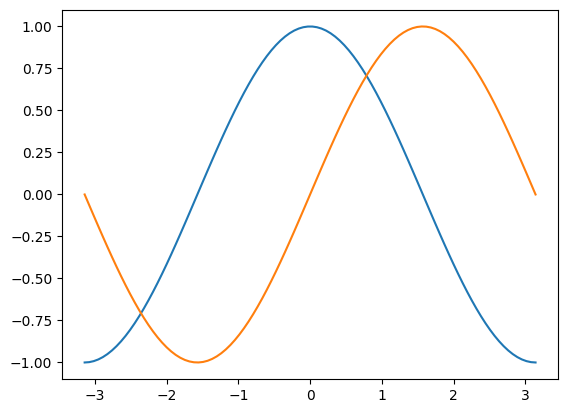

In [17]:
plt.plot(x, cos_x, label = 'cos x')
plt.plot (x, sin_x, label = 'sin x')

### OO Interface

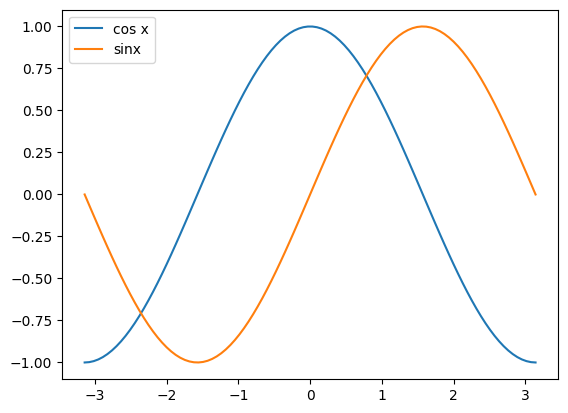

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label ='cos x')
ax.plot(x, sin_x, label ='sinx')
plt.legend()

# 3 What is OO ax, really?

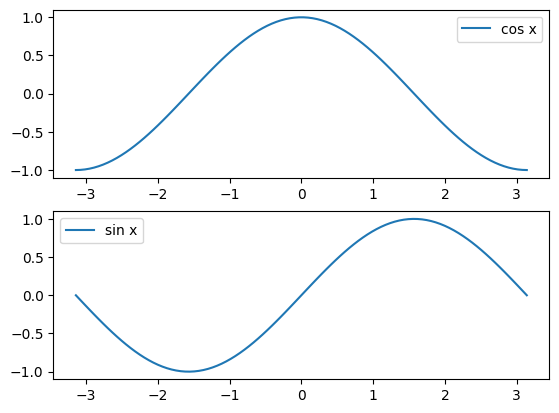

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

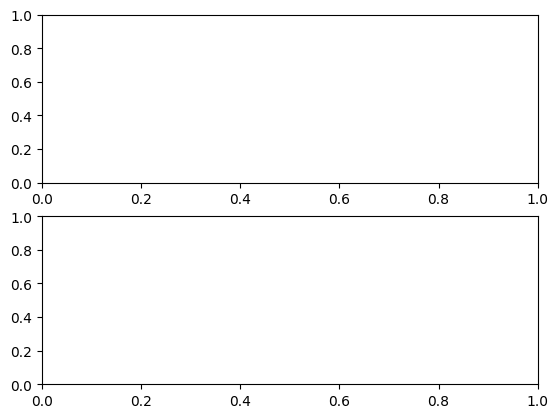

In [22]:
fig, ax = plt.subplots(ncols=1, nrows=2) # asking for 2 rows and 1 column

In [23]:
type(ax)

numpy.ndarray

In [25]:
ax.shape #size of ax

(2,)

In [27]:
type(ax[0])

matplotlib.axes._axes.Axes

# 4 A complete OO example

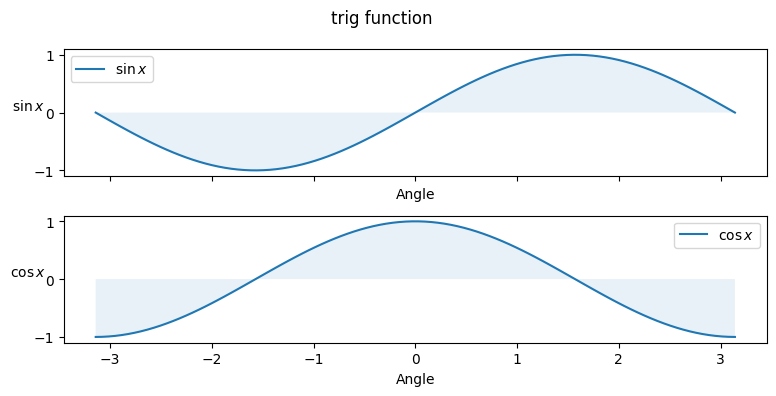

In [48]:
fig, ax = plt.subplots(
    nrows =2,
    figsize =(8,4),
    sharex = 'col',
    sharey = 'row',
)

my_sin= ax[0]
my_cos= ax[1]

my_sin.plot (x, sin_x, label = '$\\sin x$')
my_sin.legend()

my_cos.plot(x, cos_x, label = '$\\cos x$')
my_cos.legend()

my_sin.fill_between(x, 0, sin_x, alpha=.1)
my_cos.fill_between(x, 0, cos_x, alpha=.1)

plt.suptitle ('trig function')

my_sin.set_xlabel ('Angle')
my_cos.set_xlabel ('Angle')

my_sin.set_ylabel ('$\\sin x$', rotation=0)
my_cos.set_ylabel ('$\\cos x$', rotation=0)

plt.tight_layout()



# 5 Multiple rows and columns

### Using ax

## 5.1 Sharing axes

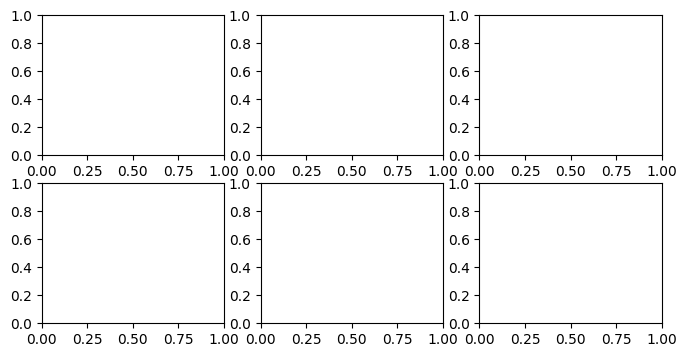

In [53]:
fig, ax = plt.subplots(
    nrows=2, ncols=3,
    figsize = (8,4),
)

In [62]:
fig, ax = plt.subplots(
    nrows=2, ncols=3,
    figsize = (8,4),
)

for row in range(2):
    for col in range (3):
        a[row, cell.plotx, col=cos_x, label = f'{row}, {col}']
        ax [row, col]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2262065334.py, line 8)

## 5.2 Accessing all axes

# 6 Other useful plots

## 6.1 Histograms

### Data

In [ ]:

# Your code here


### A quick helper function

In [ ]:

# Your code here


### The histogram

In [ ]:

# Your code here


## 6.2 Scatter plots

## 6.3 Bar charts

## 6.4 Pie charts